In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Import Data & Merge

In [42]:
Q1 =  pd.read_csv('data/final_data/Q1.csv')
Macro_Data = pd.read_csv('data/final_data/macro_data.csv')

In [43]:
Merged_Data = pd.merge(Q1,Macro_Data[['GDP_log_return', 'Cons_log_return', 'IPT_log_return', 'Unempl', 'Dates']], right_on='Dates', left_on='rankdate').drop('rankdate', axis=1)

In [44]:
# Setting display options to show all columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(Merged_Data)

,permno,price,ret,cfacshr,Unnamed: 0,ticker,cusip,cname,fpedats,statpers,meanest,actual,anndats_act,fpi,capei,be,bm,evm,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,efftax,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,gprof,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,mktcap,ptb,peg_trailing,divyield,ffi49,adj_actual,adj_meanest,GDP_log_return,Cons_log_return,IPT_log_return,Unempl,Dates
0,10001.0,10.980000,0.022727,1.0000,446868,GFGC,36720410,GAS NATURAL INC,2010-12-31,2011-02-17,0.36,0.2400,2011-04-05,6,20.942035,73.898,0.861905,8.378183,11.934783,11.934783,0.940080,12.786876,0.611523,0.063355,0.166109,0.121093,0.166109,0.101486,0.108372,0.140501,0.105587,0.123586,0.375727,0.105989,0.163055,0.105989,0.187206,0.119967,0.110355,0.770447,0.229553,0.434894,0.229553,0.124592,0.062300,0.207756,0.174685,0.380636,0.302059,2.737154,0.472165,0.607822,0.342965,0.390549,0.172855,0.105065,-0.266984,0.840978,0.297153,0.464880,0.408038,0.868740,3.661616,5.087236,0.341804,0.885140,1.072488,49.736410,11.252175,0.845836,6.948400,10.498439,0.956513,1.241503,32.435307,0.000000,0.000000,0.000000,-0.008597,86.017316,1.164001,0.588007,0.049180,31.0,0.2400,0.36,NaN,NaN,NaN,8.9,2011-02
1,10026.0,43.970001,0.035319,1.0000,393691,JJSF,46603210,J & J SNACK FOOD,2011-03-31,2011-02-17,0.49,0.4600,2011-04-25,6,23.272766,417.634,0.466909,7.613977,16.976834,16.976834,1.161161,11.976282,0.163823,0.068842,0.151775,0.109511,0.366284,0.110200,0.112013,0.233136,0.124839,0.213693,0.380143,0.134507,0.000000,0.134507,0.316727,0.247585,0.549748,0.998908,0.001092,0.001553,0.001092,0.064955,0.054190,0.973499,0.245703,0.285931,0.001231,0.005406,0.297227,0.684910,0.004159,1.598242,1.020971,0.657597,0.542255,0.924397,0.001014,0.208099,0.119641,0.262784,4.448019,6.749873,1.421352,2.462628,3.264800,35.405769,8.318983,1.500880,11.280425,9.015392,1.893218,1.895287,4.649574,0.001231,0.003949,0.000000,-0.042793,816.566893,1.955221,0.884402,0.010689,2.0,0.4600,0.49,NaN,NaN,NaN,8.9,2011-02
2,10032.0,31.430000,0.162352,1.0000,290722,PLUS,72913210,PLEXUS CORP,2011-03-31,2011-02-17,0.56,0.5900,2011-04-20,6,17.237355,680.474,0.542898,9.631512,13.317797,13.317797,0.592920,-143.135209,0.000000,0.045013,0.067848,0.047905,0.121126,0.045716,0.064746,0.118116,0.160665,0.132124,0.009996,0.160665,0.146844,0.160665,0.136254,0.085446,0.188994,0.846649,0.153351,0.176502,0.153351,0.080120,0.069610,0.312068,0.483698,0.289863,0.106270,0.950741,0.131168,0.774523,0.188338,0.271838,-0.018827,0.003073,-37.060143,2.682950,0.181127,0.490241,0.426716,0.961710,11.500706,10.058609,0.402916,1.080046,2.091890,68.519308,4.343540,1.725714,7.495367,6.533412,2.866204,3.385350,4.162422,0.000000,0.000000,0.000000,0.086867,1274.046492,1.872293,0.548432,0.019248,37.0,0.5900,0.56,NaN,NaN,NaN,8.9,2011-02
3,10051.0,26.900000,0.309002,1.0000,298012,HGR,41043F20,HANGER ORTHOPEDI,2011-03-31,2011-02-17,0.21,0.1900,2011-04-27,6,41.732404,428.874,0.591607,10.107788,41.384615,41.384615,1.092351,15.791178,0.000000,0.026224,0.149314,0.126302,0.149314,0.043363,0.051551,0.126047,0.054769,0.129089,0.395243,0.063014,0.068531,0.063014,0.363461,0.270269,0.114977,0.420765,0.579235,0.587324,0.579235,0.067175,0.066017,0.052088,0.340703,0.411180,0.479222,4.167969,0.013773,0.147325,0.719714,1.188455,0.550593,0.081116,0.458933,6.747580,1.169756,0.656680,0.596137,1.912734,1.706493,3.402670,0.353559,1.852142,2.809266,84.887335,7.335549,0.844175,7.294705,24.732248,0.943741,2.242916,4.399265,0.000000,0.000000,0.000000,-0.036258,892.864787,2.081881,5.115755,0.023529,11.0,0.1900,0.21,NaN,NaN,NaN,8.9,2011-02
4,10104.0,32.900002,0.027162,1.0000

# Preparing the datasets

In [45]:
Merged_Data.sort_values(by='Dates',ascending= True,inplace=True)
Merged_Data

,permno,price,ret,cfacshr,Unnamed: 0,ticker,cusip,cname,fpedats,statpers,meanest,actual,anndats_act,fpi,capei,be,bm,evm,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,efftax,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,gprof,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,mktcap,ptb,peg_trailing,divyield,ffi49,adj_actual,adj_meanest,GDP_log_return,Cons_log_return,IPT_log_return,Unempl,Dates
1048322,83601.0,27.750000,0.010317,5.06250,188673,WTHG,98181110,WORTHINGTON INDS,1985-02-28,1985-02-14,0.11,0.0948,1985-03-19,6,19.987620,206.373,0.512784,5.270272,14.378221,14.378221,0.770016,19.666044,0.145276,0.053433,0.135978,0.114524,0.202310,0.104494,0.074887,0.259814,0.187720,0.308790,0.488320,0.204993,0.162937,0.204993,0.294522,0.221106,0.371549,0.707314,0.292686,0.308082,0.292686,0.089977,0.085480,0.069065,0.456337,0.450826,0.215490,0.862897,0.049974,0.483034,0.405176,1.023225,0.294635,0.050470,-0.923424,1.156964,0.377217,0.505265,0.404788,1.021284,6.327371,11.418308,0.142981,1.234031,2.269845,82.482612,5.795004,1.836532,7.353543,12.496836,2.625657,3.712153,5.925851,0.000000,0.000000,0.0,0.027007,510.766500,2.474968,0.923538,0.023063,19.0,0.0948,0.11,NaN,NaN,NaN,7.3,1985-02
1048186,39765.0,52.250000,0.135870,4.50000,256775,HDL,41025210,HANDLEMAN CO,1985-01-31,1985-02-14,0.21,0.2378,1985-02-26,6,35.950486,86.379,0.336367,5.486406,18.462885,18.462885,1.010092,108.360993,0.163316,0.054484,0.111627,0.095161,0.287455,0.100660,0.070950,0.264315,0.248171,0.416667,0.452794,0.251412,0.120573,0.251412,0.431009,0.230213,0.623206,0.939738,0.060262,0.067843,0.060262,0.047246,0.041529,0.206030,0.362841,0.485037,0.035467,0.146553,0.111734,0.926290,0.061929,0.513577,0.042887,0.243296,0.556036,3.745874,0.063354,0.508720,0.461078,1.035499,96.472393,163.147239,0.222425,1.131132,1.775273,49.098552,5.089415,2.168015,5.343143,4.282343,4.147053,4.412991,5.934471,0.000000,0.000000,0.0,0.101341,357.808000,4.142303,0.494714,0.017608,42.0,0.2378,0.21,NaN,NaN,NaN,7.3,1985-02
1048185,39328.0,17.000000,0.050193,1.33333,495310,GLDC,38101010,GOLDEN ENTS,1985-02-28,1985-02-14,0.18,0.1800,1985-04-09,6,22.210450,44.251,0.270626,7.841655,18.578887,18.578887,1.602450,13.766708,0.120130,0.080948,0.157688,0.124416,0.593098,0.133050,0.114219,0.361022,0.224727,0.342434,0.443388,0.231078,0.223428,0.231078,0.347063,0.291438,1.291709,0.981472,0.018528,0.033059,0.018528,0.195988,0.109842,1.103754,0.183171,0.306775,0.026849,0.078180,0.439550,0.808517,0.074169,2.093635,1.545460,0.992685,0.133194,0.431649,0.018330,0.202883,0.133356,0.254521,60.778523,91.879195,1.365158,2.536531,3.105339,25.157693,9.497879,2.177899,13.937175,9.455841,2.681598,2.732220,6.306396,0.000000,0.084701,0.0,-0.079370,176.324000,3.984633,0.449395,0.014118,2.0,0.1800,0.18,NaN,NaN,NaN,7.3,1985-02
1048184,39116.0,3.000000,0.043478,1.00000,383553,AEE,00887810,AILEEN INC,1985-01-31,1985-02-14,-0.15,-0.2600,1985-03-06,6,-11.924824,31.399,2.249373,88.666667,-7.894737,-7.894737,0.280933,-5.834483,0.232593,-0.035993,0.004760,-0.041860,0.244941,-0.035993,0.010626,0.005853,-0.060270,-0.057976,0.440008,-0.060270,-0.034741,-0.060270,-0.063391,-0.051522,0.293369,0.910750,0.089250,0.258644,0.089250,0.190380,0.097399,0.053904,0.545982,0.404477,0.197030,34.562016,0.654929,0.777962,0.222038,0.023931,-0.242093,-0.188339,0.294434,0.637267,0.097997,0.306207,0.270469,0.441352,-1.960546,-3.443096,0.069289,0.987756,2.175587,140.576699,3.721742,1.229738,5.588144,17.414386,1.572253,1.726329,4.276866,0.000000,0.009132,0.0,0.014951,15.228000,0.484984,-0.028504,0.032542,10.0,-0.2600,-0.15,NaN,NaN,NaN,7.3,1985-02
1048183,38746.0,16.5000

In [46]:
Columns_to_drop = ['permno','cfacshr','Unnamed: 0','ticker','cusip','cname','fpedats','statpers','anndats_act','fpi','ffi49','actual', 'meanest']
Merged_Data.drop(columns=Columns_to_drop,axis = 1, inplace=True)

In [47]:
# Missing values per column
missing_values = Merged_Data.isna().sum()
print("Q1 Missing Values:")
print(missing_values[missing_values > 0])

Q1 Missing Values:
price                   9
ret                    52
GDP_log_return     783138
Cons_log_return    783138
IPT_log_return     783138
dtype: int64


In [48]:
Merged_Data[Merged_Data.GDP_log_return.isna()==True]

,price,ret,capei,be,bm,evm,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,efftax,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,gprof,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,mktcap,ptb,peg_trailing,divyield,adj_actual,adj_meanest,GDP_log_return,Cons_log_return,IPT_log_return,Unempl,Dates
1048322,27.750000,0.010317,19.987620,206.373,0.512784,5.270272,14.378221,14.378221,0.770016,19.666044,0.145276,0.053433,0.135978,0.114524,0.202310,0.104494,0.074887,0.259814,0.187720,0.308790,0.488320,0.204993,0.162937,0.204993,0.294522,0.221106,0.371549,0.707314,0.292686,0.308082,0.292686,0.089977,0.085480,0.069065,0.456337,0.450826,0.215490,0.862897,0.049974,0.483034,0.405176,1.023225,0.294635,0.050470,-0.923424,1.156964,0.377217,0.505265,0.404788,1.021284,6.327371,11.418308,0.142981,1.234031,2.269845,82.482612,5.795004,1.836532,7.353543,12.496836,2.625657,3.712153,5.925851,0.00000,0.000000,0.000000,0.027007,510.766500,2.474968,0.923538,0.023063,0.0948,0.11,NaN,NaN,NaN,7.3,1985-02
1048186,52.250000,0.135870,35.950486,86.379,0.336367,5.486406,18.462885,18.462885,1.010092,108.360993,0.163316,0.054484,0.111627,0.095161,0.287455,0.100660,0.070950,0.264315,0.248171,0.416667,0.452794,0.251412,0.120573,0.251412,0.431009,0.230213,0.623206,0.939738,0.060262,0.067843,0.060262,0.047246,0.041529,0.206030,0.362841,0.485037,0.035467,0.146553,0.111734,0.926290,0.061929,0.513577,0.042887,0.243296,0.556036,3.745874,0.063354,0.508720,0.461078,1.035499,96.472393,163.147239,0.222425,1.131132,1.775273,49.098552,5.089415,2.168015,5.343143,4.282343,4.147053,4.412991,5.934471,0.00000,0.000000,0.000000,0.101341,357.808000,4.142303,0.494714,0.017608,0.2378,0.21,NaN,NaN,NaN,7.3,1985-02
1048185,17.000000,0.050193,22.210450,44.251,0.270626,7.841655,18.578887,18.578887,1.602450,13.766708,0.120130,0.080948,0.157688,0.124416,0.593098,0.133050,0.114219,0.361022,0.224727,0.342434,0.443388,0.231078,0.223428,0.231078,0.347063,0.291438,1.291709,0.981472,0.018528,0.033059,0.018528,0.195988,0.109842,1.103754,0.183171,0.306775,0.026849,0.078180,0.439550,0.808517,0.074169,2.093635,1.545460,0.992685,0.133194,0.431649,0.018330,0.202883,0.133356,0.254521,60.778523,91.879195,1.365158,2.536531,3.105339,25.157693,9.497879,2.177899,13.937175,9.455841,2.681598,2.732220,6.306396,0.00000,0.084701,0.000000,-0.079370,176.324000,3.984633,0.449395,0.014118,0.1800,0.18,NaN,NaN,NaN,7.3,1985-02
1048184,3.000000,0.043478,-11.924824,31.399,2.249373,88.666667,-7.894737,-7.894737,0.280933,-5.834483,0.232593,-0.035993,0.004760,-0.041860,0.244941,-0.035993,0.010626,0.005853,-0.060270,-0.057976,0.440008,-0.060270,-0.034741,-0.060270,-0.063391,-0.051522,0.293369,0.910750,0.089250,0.258644,0.089250,0.190380,0.097399,0.053904,0.545982,0.404477,0.197030,34.562016,0.654929,0.777962,0.222038,0.023931,-0.242093,-0.188339,0.294434,0.637267,0.097997,0.306207,0.270469,0.441352,-1.960546,-3.443096,0.069289,0.987756,2.175587,140.576699,3.721742,1.229738,5.588144,17.414386,1.572253,1.726329,4.276866,0.00000,0.009132,0.000000,0.014951,15.228000,0.484984,-0.028504,0.032542,-0.2600,-0.15,NaN,NaN,NaN,7.3,1985-02
1048183,16.500000,0.073171,13.970391,68.852,1.360866,5.388723,7.472825,7.472825,0.650839,9.891905,0.000000,0.104659,0.182881,0.182881,0.540779,0.159942,0.127965,0.143050,0.124807,0.237724,0.364990,0.185240,0.124305,0.185240,0.132709,0.077811,0.405855,0.708195,0.291805,0.163560,0.291805,0.080618,0.143829,0.160896,0.084186,0.284005,0.092581,0.674531,0.346358,0.344537,0.275685,0.664906,0.239213,0.291055,0.666467,4.092797,0.270523,0.599135,0.454647,1.494606,6.898727,10.307459,0.466993,1.094120,2.724837,241.561715

In [49]:
Merged_Data.dropna(axis=0, inplace=True)
Merged_Data = Merged_Data.loc[abs(Merged_Data['adj_actual']) < 10]

# Split into X & y

In [50]:
y = Merged_Data.adj_actual
X = Merged_Data.loc[:, ~Merged_Data.columns.isin(['adj_actual', 'Dates'])]

In [51]:
per_train = 0.8 #Percentage allocated to training set
X_train, X_test = np.split(X,[int(per_train *len(X))])
y_train, y_test = np.split(y,[int(per_train *len(y))])

/Users/arianna/opt/anaconda3/envs/DSB/lib/python3.9/site-packages/numpy/lib/shape_base.py:790: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


# Random forest

In [52]:
#check all float
X.dtypes[X.dtypes != "float64"]

Series([], dtype: object)

In [57]:

# Instantiate a RandomForestRegressor 
forest_model_rf = RandomForestRegressor(n_estimators=2000, max_depth=7, min_samples_leaf=5, max_samples=0.6, verbose=2, n_jobs=-1) # without max sample look at picture
print("Training Random Forest")
forest_model_rf.fit(X_train, y_train)
print("Random Forest training completed")

Training Random Forest


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 2000
building tree 2 of 2000
building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   15.9s


building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building tree 41 of 2000
building tree 42 of 2000
building tree 43 of 2000
building tree 44 of 2000
building tree 45 of 2000
building tree 46 of 2000
building tree 47 of 2000
building tree 48 of 2000
building tree 49 of 2000
building tree 50 of 2000
building tree 51 of 2000
building tree 52 of 2000
building tree 53 of 2000
building tree 54 of 2000
building tree 55 of 2000
building tree 56 of 2000
building tree 57 of 2000
building tree 58 of 2000
building tree 59 of 2000
building tree 60 of 2000
building tree 61 of 2000
building tree 62 of 2000
building tree 63 of 2000
building tree 64 of 2000
building tree 65 of 2000
building tree 66 of 2000
building tree 67 of 2000
building tree 68 of 2000
building tree 69 of 2000
building tree 70 of 2000
building tree 71 of 2000
building tree 72 of 2000
building tree 73 of 2000
building tree 74 of 2000
building tree 75 of 2000
building tree 76 of 2000
building tree 77 of 2000


[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.2min


building tree 155 of 2000
building tree 156 of 2000
building tree 157 of 2000
building tree 158 of 2000
building tree 159 of 2000
building tree 160 of 2000
building tree 161 of 2000
building tree 162 of 2000
building tree 163 of 2000
building tree 164 of 2000
building tree 165 of 2000
building tree 166 of 2000
building tree 167 of 2000
building tree 168 of 2000
building tree 169 of 2000
building tree 170 of 2000
building tree 171 of 2000
building tree 172 of 2000
building tree 173 of 2000
building tree 174 of 2000
building tree 175 of 2000
building tree 176 of 2000
building tree 177 of 2000
building tree 178 of 2000
building tree 179 of 2000
building tree 180 of 2000
building tree 181 of 2000
building tree 182 of 2000
building tree 183 of 2000
building tree 184 of 2000
building tree 185 of 2000
building tree 186 of 2000
building tree 187 of 2000
building tree 188 of 2000
building tree 189 of 2000
building tree 190 of 2000
building tree 191 of 2000
building tree 192 of 2000
building tre

[Parallel(n_jobs=-1)]: Done 345 tasks      | elapsed:  2.8min


building tree 357 of 2000
building tree 358 of 2000
building tree 359 of 2000
building tree 360 of 2000
building tree 361 of 2000
building tree 362 of 2000
building tree 363 of 2000
building tree 364 of 2000
building tree 365 of 2000
building tree 366 of 2000
building tree 367 of 2000
building tree 368 of 2000
building tree 369 of 2000
building tree 370 of 2000
building tree 371 of 2000
building tree 372 of 2000
building tree 373 of 2000
building tree 374 of 2000
building tree 375 of 2000
building tree 376 of 2000
building tree 377 of 2000
building tree 378 of 2000
building tree 379 of 2000
building tree 380 of 2000
building tree 381 of 2000
building tree 382 of 2000
building tree 383 of 2000
building tree 384 of 2000
building tree 385 of 2000
building tree 386 of 2000
building tree 387 of 2000
building tree 388 of 2000
building tree 389 of 2000
building tree 390 of 2000
building tree 391 of 2000
building tree 392 of 2000
building tree 393 of 2000
building tree 394 of 2000
building tre

[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:  5.2min


building tree 639 of 2000
building tree 640 of 2000
building tree 641 of 2000
building tree 642 of 2000
building tree 643 of 2000
building tree 644 of 2000
building tree 645 of 2000
building tree 646 of 2000
building tree 647 of 2000
building tree 648 of 2000
building tree 649 of 2000
building tree 650 of 2000
building tree 651 of 2000
building tree 652 of 2000
building tree 653 of 2000
building tree 654 of 2000
building tree 655 of 2000
building tree 656 of 2000
building tree 657 of 2000
building tree 658 of 2000
building tree 659 of 2000
building tree 660 of 2000
building tree 661 of 2000
building tree 662 of 2000
building tree 663 of 2000
building tree 664 of 2000
building tree 665 of 2000
building tree 666 of 2000
building tree 667 of 2000
building tree 668 of 2000
building tree 669 of 2000
building tree 670 of 2000
building tree 671 of 2000
building tree 672 of 2000
building tree 673 of 2000
building tree 674 of 2000
building tree 675 of 2000
building tree 676 of 2000
building tre

[Parallel(n_jobs=-1)]: Done 993 tasks      | elapsed:  8.1min


building tree 1004 of 2000
building tree 1005 of 2000
building tree 1006 of 2000
building tree 1007 of 2000
building tree 1008 of 2000
building tree 1009 of 2000
building tree 1010 of 2000
building tree 1011 of 2000
building tree 1012 of 2000
building tree 1013 of 2000
building tree 1014 of 2000
building tree 1015 of 2000
building tree 1016 of 2000
building tree 1017 of 2000
building tree 1018 of 2000
building tree 1019 of 2000
building tree 1020 of 2000
building tree 1021 of 2000
building tree 1022 of 2000
building tree 1023 of 2000
building tree 1024 of 2000
building tree 1025 of 2000
building tree 1026 of 2000
building tree 1027 of 2000
building tree 1028 of 2000
building tree 1029 of 2000
building tree 1030 of 2000
building tree 1031 of 2000
building tree 1032 of 2000
building tree 1033 of 2000
building tree 1034 of 2000
building tree 1035 of 2000
building tree 1036 of 2000
building tree 1037 of 2000
building tree 1038 of 2000
building tree 1039 of 2000
building tree 1040 of 2000
b

[Parallel(n_jobs=-1)]: Done 1438 tasks      | elapsed: 11.8min


building tree 1449 of 2000
building tree 1450 of 2000
building tree 1451 of 2000
building tree 1452 of 2000
building tree 1453 of 2000
building tree 1454 of 2000
building tree 1455 of 2000
building tree 1456 of 2000
building tree 1457 of 2000
building tree 1458 of 2000
building tree 1459 of 2000
building tree 1460 of 2000
building tree 1461 of 2000
building tree 1462 of 2000
building tree 1463 of 2000
building tree 1464 of 2000
building tree 1465 of 2000
building tree 1466 of 2000
building tree 1467 of 2000
building tree 1468 of 2000
building tree 1469 of 2000
building tree 1470 of 2000
building tree 1471 of 2000
building tree 1472 of 2000
building tree 1473 of 2000
building tree 1474 of 2000
building tree 1475 of 2000
building tree 1476 of 2000
building tree 1477 of 2000
building tree 1478 of 2000
building tree 1479 of 2000
building tree 1480 of 2000
building tree 1481 of 2000
building tree 1482 of 2000
building tree 1483 of 2000
building tree 1484 of 2000
building tree 1485 of 2000
b

[Parallel(n_jobs=-1)]: Done 1965 tasks      | elapsed: 16.1min


building tree 1977 of 2000
building tree 1978 of 2000
building tree 1979 of 2000
building tree 1980 of 2000
building tree 1981 of 2000
building tree 1982 of 2000
building tree 1983 of 2000
building tree 1984 of 2000
building tree 1985 of 2000
building tree 1986 of 2000
building tree 1987 of 2000
building tree 1988 of 2000
building tree 1989 of 2000
building tree 1990 of 2000
building tree 1991 of 2000
building tree 1992 of 2000
building tree 1993 of 2000
building tree 1994 of 2000
building tree 1995 of 2000
building tree 1996 of 2000
building tree 1997 of 2000
building tree 1998 of 2000
building tree 1999 of 2000
building tree 2000 of 2000
Random Forest training completed


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 16.4min finished


In [58]:
y_hat_train = forest_model_rf.predict(X_train)
y_hat_test = forest_model_rf.predict(X_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 2000 out of 2000 | elapsed:    1.9s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:    0.3s
[Parallel(n_jobs=

 # Plotting

0.8268684367423361


(-11.0, 11.0)

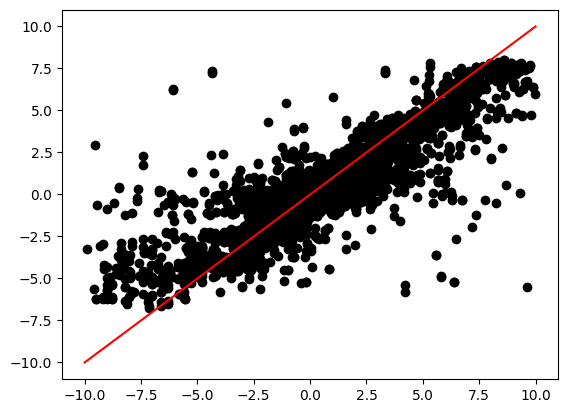

In [63]:
plt.plot(y_test, y_hat_test, 'o', color='black')
plt.plot([-10,10], [-10,10], 'r-')
from sklearn.metrics import r2_score
print(r2_score(y_test, y_hat_test))
plt.xlim([-11,11])
plt.ylim([-11,11])

0.7453113358760601


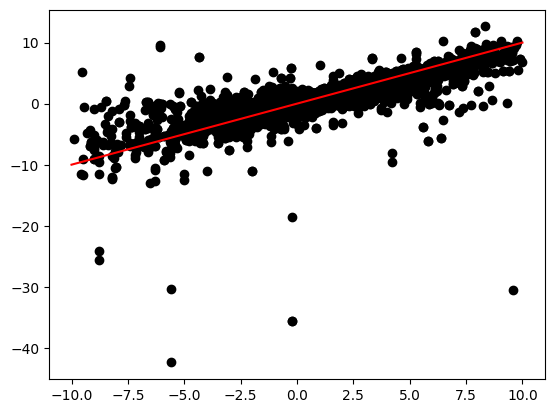

In [65]:
plt.plot(y_test, X_test.adj_meanest, 'o', color='black')
plt.plot([-10,10], [-10,10], 'r-')
print(r2_score(y_test, X_test.adj_meanest))
#plt.xlim([-11,11])
#plt.ylim([-11,11])

In [ ]:
(X_test.adj_meanest-y_hat_test)/X_test.price